## Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)

### Load Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris_X, iris_y = iris['data'], iris['target']

In [4]:
iris_X_df = pd.DataFrame(iris_X)
iris_y_df = pd.DataFrame(iris_y)

In [5]:
iris_X_df.columns = iris['feature_names']

In [6]:
iris_X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


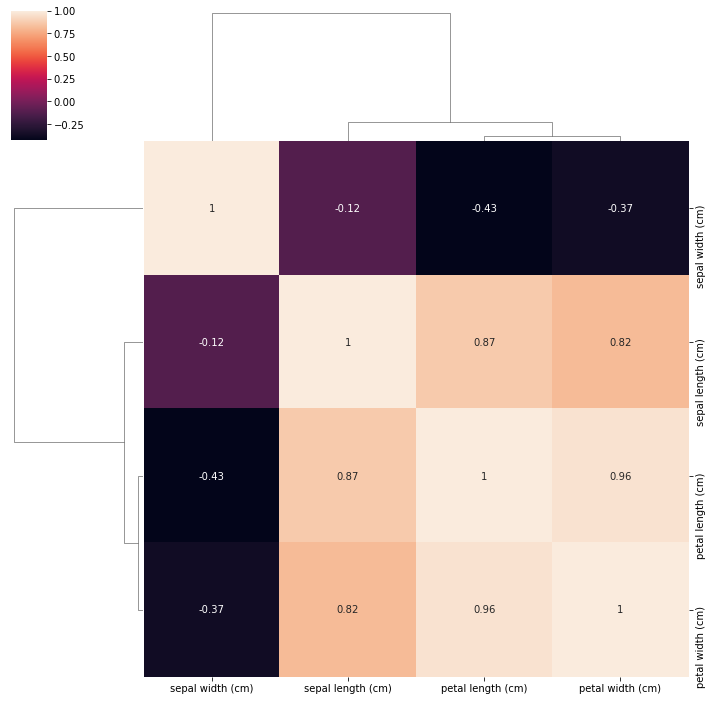

In [7]:
# 다중공선성 확인.
# 다중공선성 확인 시 Lasso Regression 사용불가. ElasticNet이나 Ridge로 대체.

import seaborn as sns
iris_X_df.corr()

sns.clustermap(data=iris_X_df.corr(),
              annot=True)

Correlation이 너무 높다..ㅠㅠ

### Implement Gradient Descent

In [8]:
def softmax(product):
    '''
    input
    
        product: dot product of W and X.T
        
    '''
    denom = sum(np.exp(product))
    return np.array([np.exp(i)/denom for i in product])

In [80]:
from sklearn.model_selection import train_test_split

def Gradient_Descent(X, y, eta=0.05, n_iterations=10000):

    ''' 
    input
    
        X: One row of input consisting of [sepal length, sepal width, petal length, petal width]
        y: label
        
    '''
    W = np.random.randn(3,4)
    b = np.zeros((3,1))
    min_loss = 9999
    
    X, X_val, y, y_val = train_test_split(X, y, test_size=0.1, stratify=y)
    
    m = X.shape[0]
    m_val = X_val.shape[0]
    
    for iteration in range(n_iterations):
        
        # Compute Weight dot X
        Z = W.dot(X.T) + b
        
        # Compute Sigmoid
        y_hat = softmax(Z)
        
        # Compute gradient
        dW = 1/m * np.dot(X.T, (y_hat.T - y)).T
        db = 1/m * np.sum(y_hat.T - y, axis=0).reshape(3,1)
        
        W = W - eta * dW
        b = b - eta * db
        
        loss = -(1/m) * np.sum(y * np.log(y_hat).T)
        
        # Do the same for validation
        # Compute Weight dot X
        Z_val = W.dot(X_val.T) + b
        
        # Compute Sigmoid
        y_hat_val = softmax(Z_val)
        
        # Compute val loss
        loss_val = -(1/m_val) * np.sum(y_val * np.log(y_hat_val).T)
        
        #print('train', y, np.log(y_hat.T))
        #print('loss', np.dot(y_val * np.log(y_hat_val)).shape)
        
        if iteration%30 == 0:

            print(f'iteration {iteration}, train loss: {loss:.4}, val loss: {loss_val:.4}, min loss: {min_loss}')
            
            # Early stopping
            
            if loss_val > min_loss or abs(loss_val - min_loss) < 0.0001:
                print(f'Early stopping at epoch {iteration}')
                return (W_best, b_best)
        
        if loss_val < min_loss:
            W_best = W
            b_best = b
            min_loss = loss_val
            
    return (W_best, b_best)

### Test

In [81]:
X, X_test, y, y_test = train_test_split(iris_X, iris_y, test_size=0.1, stratify=iris_y)

In [82]:
W, b = Gradient_Descent(X, np.identity(3)[y])

iteration 0, train loss: 7.963, val loss: 6.842, min loss: 9999
iteration 30, train loss: 0.9802, val loss: 1.016, min loss: 1.0349542675092147
iteration 60, train loss: 0.7127, val loss: 0.6992, min loss: 0.7055509867535538
iteration 90, train loss: 0.6032, val loss: 0.5602, min loss: 0.5636693384053081
iteration 120, train loss: 0.5376, val loss: 0.4772, min loss: 0.47946343687438336
iteration 150, train loss: 0.4914, val loss: 0.4201, min loss: 0.42175852170273764
iteration 180, train loss: 0.4558, val loss: 0.3772, min loss: 0.37844728768554786
iteration 210, train loss: 0.4267, val loss: 0.343, min loss: 0.3440185388472098
iteration 240, train loss: 0.4021, val loss: 0.3148, min loss: 0.31564703848088205
iteration 270, train loss: 0.3809, val loss: 0.291, min loss: 0.2917121456523209
iteration 300, train loss: 0.3624, val loss: 0.2706, min loss: 0.2711898975969244
iteration 330, train loss: 0.346, val loss: 0.2528, min loss: 0.2533820722021623
iteration 360, train loss: 0.3313, va

In [83]:
def predict(X, W, b):
    
    # X --> Input.
    # w --> weights.
    # b --> bias.
    
    # Predicting
    Z = W@X.T+b
    y_hat = softmax(Z)
    # Returning the class with highest probability.
    return np.argmax(y_hat.T, axis=1)

In [84]:
preds = predict(X_test, W, b)

In [85]:
preds

array([0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1], dtype=int64)

In [86]:
y_test

array([0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1])

### Assess

In [87]:
from sklearn.metrics import confusion_matrix, f1_score

In [88]:
confusion_matrix(y_test, preds)

array([[5, 0, 0],
       [0, 5, 0],
       [0, 0, 5]], dtype=int64)

In [89]:
f1_score(y_test, preds, average='weighted')

1.0